In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('../data/raw/electrical_consumption.csv')
print(f"Dataset chargé: {df.shape[0]} lignes, {df.shape[1]} colonnes")

Dataset chargé: 600 lignes, 34 colonnes


In [3]:
print("=" * 80)
print("APERÇU DES DONNÉES")
print("=" * 80)
display(df.head(10))

APERÇU DES DONNÉES


,Date,53_kW_mean,53_kW_max,71_kW_mean,71_kW_max,71A_kW_mean,71A_kW_max,83_kW_mean,83_kW_max,totalkW_mean,totalkW_max,totalkW_d-1,totalkW_w-1,totalkW_d/1,totalkW_w/1,71_71AkW_mean,71_71AkW_max,Month,Year,Day,WD,53_kW_time_max,71_kW_time_max,71A_kW_time_max,83_kW_time_max,71_71AkW_time_max,totalkW_time_max,CDD_15,HDD_25,NWD,temp_max,insolation,temp_mean,RH
0,08/06/2018,52.79,67.96,89.46,115.07,111.90,151.02,92.41,160.01,346.46,481.12,NaN,NaN,NaN,NaN,201.37,266.09,6,2018,8,4,09:00,11:00,11:00,08:00,11:00,11:00,1.2,9.1,0,20.8,0.6,16.10,83.25
1,09/06/2018,37.91,48.90,56.49,82.70,64.58,82.70,38.87,53.22,197.77,229.41,-148.69,NaN,0.57,NaN,121.11,154.62,6,2018,9,5,02:00,15:00,01:00,17:00,15:00,01:00,1.7,8.9,0,19.7,0.6,15.82,86.75
2,10/06/2018,32.76,42.79,46.89,75.51,63.68,68.32,31.72,37.40,175.04,220.42,-22.73,NaN,0.89,NaN,110.57,143.83,6,2018,10,6,21:00,00:00,01:00,16:00,01:00,02:00,4.1,5.9,0,24.5,2.3,19.14,83.25
3,11/06/2018,50.77,64.72,76.27,129.45,117.30,197.77,98.35,174.40,342.68,535.06,167.64,NaN,1.96,NaN,193.64,309.24,6,2018,11,0,18:00,16:00,17:00,14:00,17:00,17:00,7.1,3.2,0,27.8,6.2,21.58,71.25
4,12/06/2018,50.02,62.57,91.19,115.07,131.07,201.37,99.07,170.80,371.45,533.62,28.77,NaN,1.08,NaN,222.22,316.43,6,2018,12,1,08:00,15:00,14:00,11:00,15:00,15:00,8.3,2.2,0,27.9,4.9,23.46,59.00
5,13/06/2018,53.25,69.40,96.01,125.85,126.57,186.98,97.63,169.00,373.61,535.78,2.16,NaN,1.01,NaN,222.58,312.84,6,2018,13,2,18:00,15:00,15:00,09:00,15:00,15:00,5.8,4.2,0,24.2,0.8,19.96,83.75
6,14/06/2018,52.50,66.88,93.92,115.07,103.13,136.64,90.18,161.09,339.81,459.55,-33.80,NaN,0.91,NaN,197.05,248.11,6,2018,14,3,16:00,10:00,08:00,09:00,11:00,08:00,0.3,10.5,0,21.2,0.0,15.56,86.75
7,15/06/2018,53.51,68.68,89.14,111.47,100.68,133.05,83.06,142.04,326.32,443.01,-13.48,-20.14,0.96,0.94,189.86,244.52,6,2018,15,4,15:00,09:00,11:00,10:00,11:00,15:00,0.1,10.9,0,16.8,0.0,14.58,86.00
8,16/06/2018,40.60,52.50,63.07,75.51,63.25,93.49,35.89,55.38,202.80,250.27,-123.52,5.03,0.62,1.03,126.29,169.00,6,2018,16,5,05:00,03:00,03:00,10:00,03:00,03:00,0.0,11.4,0,16.2,0.0,14.50,84.50
9,17/06/2018,34.72,44.59,60.55,71.92,59.48,79.11,30.59,41.35,185.36,218.63,-17.44,10.32,0.91,1.06,120.03,151.02,6,2018,17,6,02:00,15:00,16:00,16:00,16:00,18:00,0.5,10.5,0,20.1,1.5,15.76,82.50


In [4]:
print("\n" + "=" * 80)
print("INFORMATIONS GÉNÉRALES")
print("=" * 80)
print(f"\nNombre de lignes: {df.shape[0]:,}")
print(f"Nombre de colonnes: {df.shape[1]}")
print(f"\nMémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "-" * 80)
df.info()


INFORMATIONS GÉNÉRALES

Nombre de lignes: 600
Nombre de colonnes: 34

Mémoire utilisée: 0.34 MB

--------------------------------------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               600 non-null    str    
 1   53_kW_mean         600 non-null    float64
 2   53_kW_max          600 non-null    float64
 3   71_kW_mean         600 non-null    float64
 4   71_kW_max          600 non-null    float64
 5   71A_kW_mean        600 non-null    float64
 6   71A_kW_max         600 non-null    float64
 7   83_kW_mean         600 non-null    float64
 8   83_kW_max          600 non-null    float64
 9   totalkW_mean       600 non-null    float64
 10  totalkW_max        600 non-null    float64
 11  totalkW_d-1        599 non-null    float64
 12  totalkW_w-1        593 non-null    float64
 13  to

In [5]:
print("\n" + "=" * 80)
print("TYPES DE VARIABLES")
print("=" * 80)

types_count = df.dtypes.value_counts()
print(f"\n{types_count}")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nVariables numériques ({len(numeric_cols)}): {numeric_cols}")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables catégorielles ({len(categorical_cols)}): {categorical_cols}")

datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print(f"\nVariables datetime ({len(datetime_cols)}): {datetime_cols}")


TYPES DE VARIABLES

float64    22
str         7
int64       5
Name: count, dtype: int64

Variables numériques (27): ['53_kW_mean', '53_kW_max', '71_kW_mean', '71_kW_max', '71A_kW_mean', '71A_kW_max', '83_kW_mean', '83_kW_max', 'totalkW_mean', 'totalkW_max', 'totalkW_d-1', 'totalkW_w-1', 'totalkW_d/1', 'totalkW_w/1', '71_71AkW_mean', '71_71AkW_max', 'Month', 'Year', 'Day', 'WD', 'CDD_15', 'HDD_25', 'NWD', 'temp_max', 'insolation', 'temp_mean', 'RH']

Variables catégorielles (7): ['Date', '53_kW_time_max', '71_kW_time_max', '71A_kW_time_max', '83_kW_time_max', '71_71AkW_time_max', 'totalkW_time_max']

Variables datetime (0): []


In [6]:
print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 80)
display(df.describe())


STATISTIQUES DESCRIPTIVES


,53_kW_mean,53_kW_max,71_kW_mean,71_kW_max,71A_kW_mean,71A_kW_max,83_kW_mean,83_kW_max,totalkW_mean,totalkW_max,totalkW_d-1,totalkW_w-1,totalkW_d/1,totalkW_w/1,71_71AkW_mean,71_71AkW_max,Month,Year,Day,WD,CDD_15,HDD_25,NWD,temp_max,insolation,temp_mean,RH
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,599.000000,593.000000,599.000000,593.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,333.000000,600.000000,600.000000
mean,50.232383,63.342033,52.907250,69.453117,135.962467,201.180467,78.341150,134.192683,317.448867,450.196483,0.150451,0.547943,1.043623,1.015110,188.874550,269.009867,7.158333,2018.701667,15.82500,3.001667,5.588333,5.059167,0.028333,26.547333,5.030330,20.863533,73.040417
std,9.492733,11.121755,43.257855,58.276682,60.597422,95.299182,28.502611,60.378153,76.457315,150.679525,81.143576,48.646455,0.324275,0.170233,41.468584,82.258985,3.448151,0.550608,8.74329,2.004585,3.218970,3.089070,0.166062,4.555896,3.758534,3.480174,11.909164
min,25.030000,35.960000,0.000000,0.000000,48.110000,50.340000,22.420000,25.170000,137.290000,151.020000,-206.830000,-231.030000,0.450000,0.450000,74.610000,79.110000,1.000000,2018.000000,1.00000,0.000000,0.000000,0.100000,0.000000,12.300000,0.000000,9.600000,13.000000
25%,41.205000,55.290000,0.000000,0.000000,91.840000,140.240000,44.910000,57.530000,231.120000,262.410000,-19.420000,-16.540000,0.930000,0.950000,148.267500,176.200000,5.000000,2018.000000,8.00000,1.000000,3.100000,2.700000,0.000000,23.575000,0.800000,18.635000,66.000000
50%,52.985000,64.720000,70.620000,82.700000,118.570000,179.790000,89.410000,156.420000,340.170000,496.760000,-2.520000,1.080000,0.990000,1.000000,196.780000,287.670000,8.000000,2019.000000,16.00000,3.000000,5.550000,4.600000,0.000000,27.200000,5.500000,21.200000,74.250000
75%,57.100000,71.200000,90.985000,122.260000,178.395000,266.990000,98.110000,177.720000,374.690000,567.690000,14.380000,19.060000,1.040000,1.070000,219.575000,334.410000,10.000000,2019.000000,23.00000,5.000000,7.900000,7.000000,0.000000,29.700000,8.300000,23.425000,82.000000
max,69.830000,94.570000,133.480000,186.980000,273.100000,413.520000,134.840000,243.080000,459.550000,709.820000,229.340000,200.650000,2.390000,2.100000,273.100000,442.290000,12.000000,2020.000000,31.00000,6.000000,13.000000,15.600000,1.000000,36.100000,12.400000,28.060000,96.000000


VALEURS MANQUANTES


,Colonne,Valeurs manquantes,Pourcentage (%)
insolation,insolation,267,44.500000
totalkW_w/1,totalkW_w/1,7,1.166667
totalkW_w-1,totalkW_w-1,7,1.166667
totalkW_d-1,totalkW_d-1,1,0.166667
totalkW_d/1,totalkW_d/1,1,0.166667


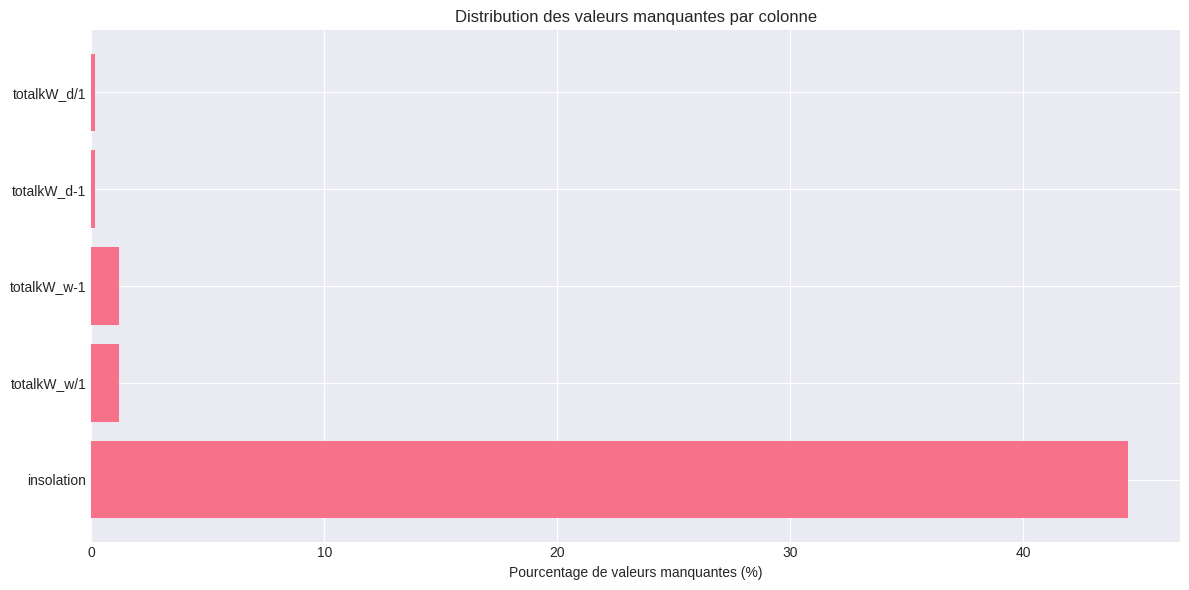

In [7]:
print("=" * 80)
print("VALEURS MANQUANTES")
print("=" * 80)

missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs manquantes': df.isnull().sum(),
    'Pourcentage (%)': (df.isnull().sum() / len(df)) * 100
}).sort_values('Pourcentage (%)', ascending=False)

missing_data = missing_data[missing_data['Valeurs manquantes'] > 0]

if len(missing_data) > 0:
    display(missing_data)
    
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Colonne'], missing_data['Pourcentage (%)'])
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.title('Distribution des valeurs manquantes par colonne')
    plt.tight_layout()
    plt.show()
else:
    print("✓ Aucune valeur manquante détectée")

In [8]:
print("\n" + "=" * 80)
print("DOUBLONS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicates} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\nExemple de doublons:")
    display(df[df.duplicated(keep=False)].head())
else:
    print("✓ Aucun doublon détecté")


DOUBLONS
Nombre de lignes dupliquées: 0 (0.00%)
✓ Aucun doublon détecté


In [9]:
print("\n" + "=" * 80)
print("CARDINALITÉ DES VARIABLES CATÉGORIELLES")
print("=" * 80)

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}: {unique_count} valeurs uniques")
    if unique_count <= 10:
        print(f"  Valeurs: {df[col].unique()}")
        print(f"  Distribution:\n{df[col].value_counts()}")


CARDINALITÉ DES VARIABLES CATÉGORIELLES

Date: 600 valeurs uniques

53_kW_time_max: 24 valeurs uniques

71_kW_time_max: 21 valeurs uniques

71A_kW_time_max: 23 valeurs uniques

83_kW_time_max: 21 valeurs uniques

71_71AkW_time_max: 23 valeurs uniques

totalkW_time_max: 24 valeurs uniques


In [10]:
df.to_csv('../data/raw/dataset_brut.csv', index=False)
print("✓ Dataset brut sauvegardé dans '../data/raw/dataset_brut.csv'")

✓ Dataset brut sauvegardé dans '../data/raw/dataset_brut.csv'
